import model
model = Model()
model.fit(train_features , train_labels)
test_pred = model.predict(test_features)
eval_metric(test_pred,test_true)

https://www.geeksforgeeks.org/pandas-scatter-plot-dataframe-plot-scatter/

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
house = pd.read_csv("HousePrices - Lab3.csv")

In [3]:
house.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [4]:
print('\nNumber of rows and columns in the data set: ',house.shape)
print('')


Number of rows and columns in the data set:  (1000, 8)



In [5]:
house.columns

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

The target variable here is the RentPerMonth and the rest 6 variables such as the BuildingType, Location , Size, AreaSqFt, NoOfBath ,
No Of People, No Of Balcony are the features (independent variable). There are multiple independent variable, so we need to fit Multiple linear regression. 

In [6]:
house.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [7]:
house.isna().sum()

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

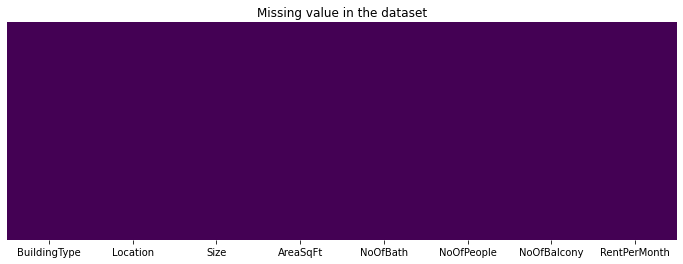

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(house.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missingvalues in the dataset

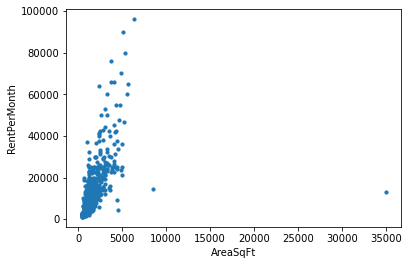

In [9]:
house.plot.scatter(x = 'AreaSqFt', y = 'RentPerMonth', s = 10);

C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='RentPerMonth'>

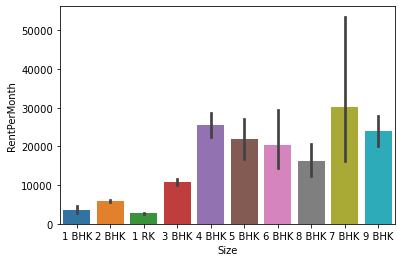

In [10]:
sns.barplot("Size","RentPerMonth",data=house)

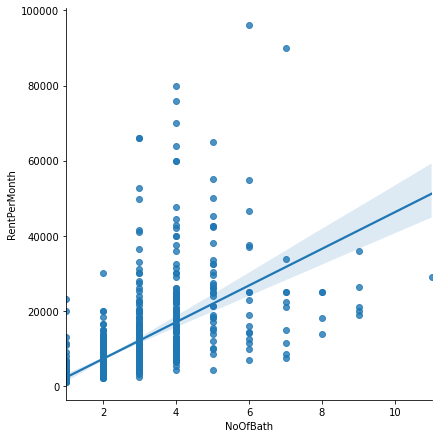

In [11]:
sns.lmplot(x='NoOfBath',y='RentPerMonth',data=house,aspect=1,height=6)

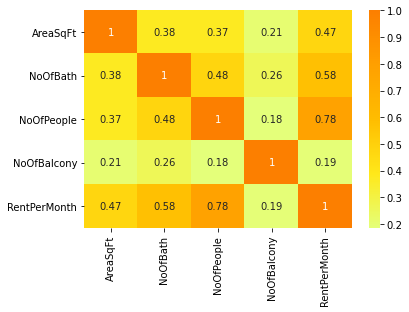

In [12]:
corr = house.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

The correlation between the number of people and the rent per month is higher. The correlation between the number of balcony and rent per month is weaker.

C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Area Per Sq Ft')

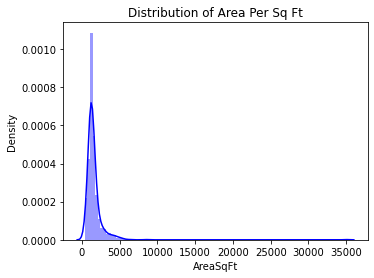

In [13]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(house['AreaSqFt'],bins=100,color='b',ax=ax)
ax.set_title('Distribution of Area Per Sq Ft')

In the plot the area per square feet varies from 350 to 35000, the plot is right skewed.

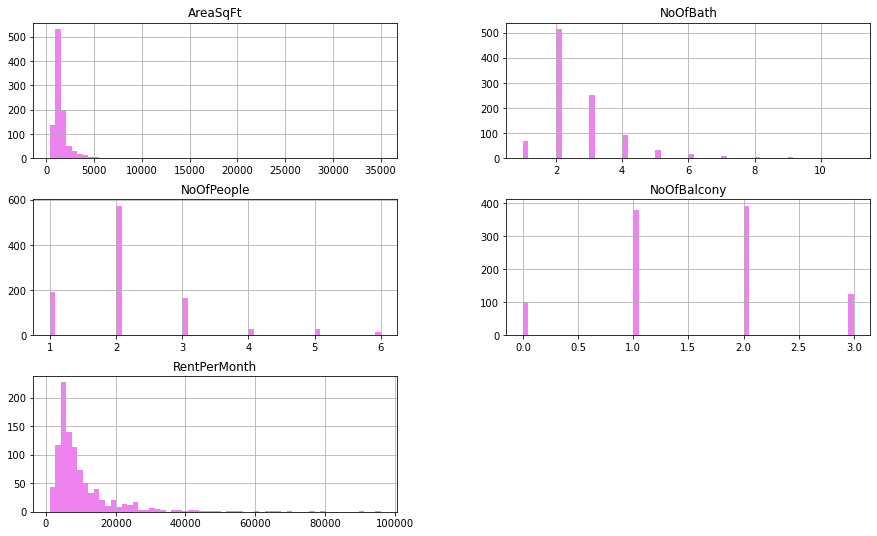

In [14]:
house.hist(bins=60, figsize=(15,9),color='violet');
plt.show()

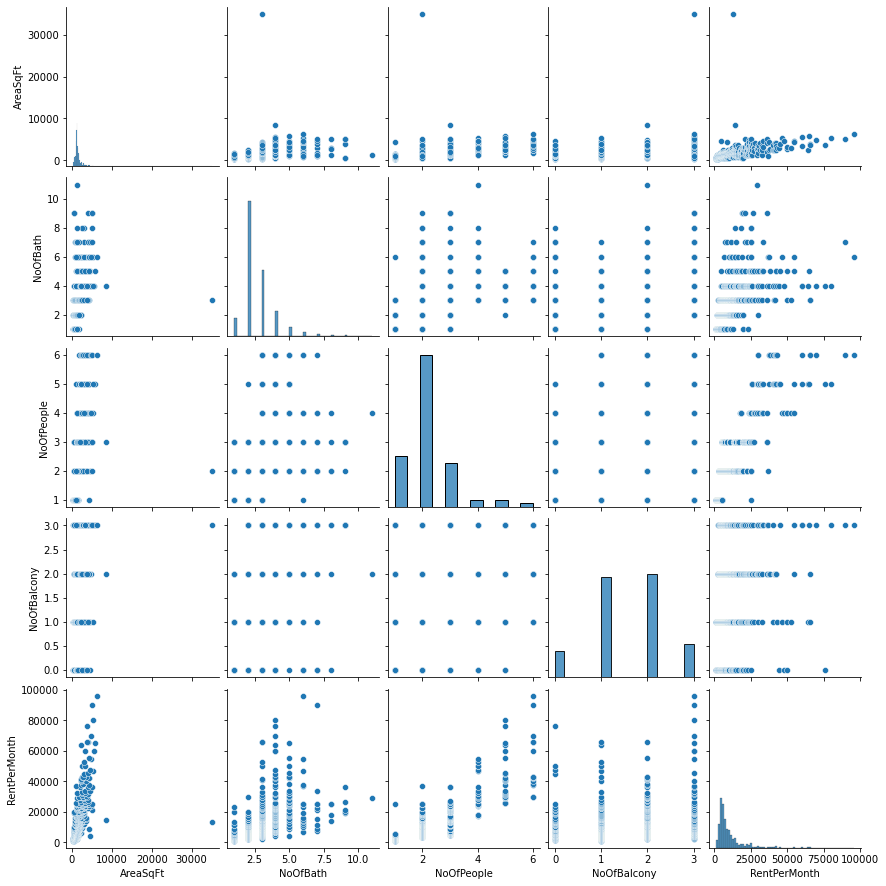

In [15]:
sns.pairplot(house)

In [16]:
house['Location'].unique()

array(['Portofino H', 'School Street', 'Portofino B', 'Portofino A',
       'Clubview Road', 'Portofino C', 'Portofino D', 'Starter Homes',
       'Portofino G', 'Portofino E', 'Portofino F'], dtype=object)

In [17]:
for i in house['Location']:
    if i!='School Street' and i!='Clubview Road' and i!='Starter Homes':
        house['Location'].replace({i:"Portofino"},inplace = True)

In [19]:
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder() 

In [20]:
list=['BuildingType','Location','Size']
for i in list:
    print('Before Converting the data in machine-readable form, The values are')
    print('\n')
    print(house[i].unique())
    # Encode labels in column 'species'.
    house[i]= label_encoder.fit_transform(house[i])
    print('\n')
    print('After Converting the data in machine-readable form, The values are')
    print(house[i].unique())
    print('\n')
house.head()    

Before Converting the data in machine-readable form, The values are


['Minimum Budget Rooms' 'Semi Furnished Single Room' 'Semi Furnished Flat'
 'Fully Furnished Single Room' 'Super Furnished Single Room'
 'Semi Furnished Villa' 'Fully Furnished Flat' 'Super Furnished Flat'
 'Fully Furnished Villa' 'Super Furnished Villa']


After Converting the data in machine-readable form, The values are
[3 5 4 1 8 6 0 7 2 9]


Before Converting the data in machine-readable form, The values are


['Portofino' 'School Street' 'Clubview Road' 'Starter Homes']


After Converting the data in machine-readable form, The values are
[1 2 0 3]


Before Converting the data in machine-readable form, The values are


['1 BHK' '2 BHK' '1 RK' '3 BHK' '4 BHK' '5 BHK' '6 BHK' '8 BHK' '7 BHK'
 '9 BHK']


After Converting the data in machine-readable form, The values are
[0 2 1 3 4 5 6 8 7 9]




,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,3,1,0,400.0,1,1,1,1100.0
1,3,1,0,450.0,1,1,1,1100.0
2,3,2,0,530.0,1,1,0,1166.0
3,3,1,0,400.0,1,1,0,1400.0
4,3,2,2,460.0,1,1,0,1500.0


### Training a Linear Regression Model

In [24]:
X = house[['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony']] 
y = house['RentPerMonth']

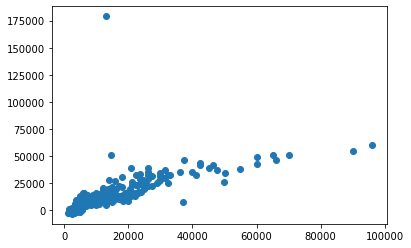

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=200)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
plt.scatter(y_test,predictions)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(450, 7)
(550, 7)
(450,)
(550,)


-12025.774698864137


In [57]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

FOR TEST SIZE :  0.5
Intercept :  -13483.895907328762
score :  -0.5472577950200699
Mean Absolute Error :  4287.131918484329
Mean Squared Error :  142970777.4675783
Root Mean Squared Error :  11957.038825209956


FOR TEST SIZE :  0.4


C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Intercept :  -13982.204114560904
score :  -0.9792436011985615
Mean Absolute Error :  4414.570915200216
Mean Squared Error :  155267684.0426133
Root Mean Squared Error :  12460.645410355488


FOR TEST SIZE :  0.3
Intercept :  -14829.41791532236
score :  0.5971153387334474
Mean Absolute Error :  3944.8546541103583
Mean Squared Error :  25792915.528923735
Root Mean Squared Error :  5078.672614859491


FOR TEST SIZE :  0.2
Intercept :  -13846.010061242885


C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SRIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


score :  0.4661572101936692
Mean Absolute Error :  4020.17566637906
Mean Squared Error :  27063403.777908474
Root Mean Squared Error :  5202.249876535005




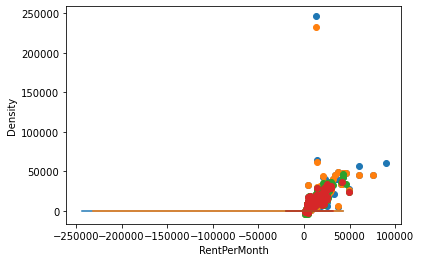

In [90]:
test_size=[0.5,0.4,0.3,0.2]
for i in test_size:
    print('FOR TEST SIZE : ',i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=2)
    regressor.fit(X_train,y_train)
    print('Intercept : ',regressor.intercept_)
    predictions =  regressor.predict(X_test)
    score=r2_score(y_test,predictions)
    print("score : ",score)
    print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Squared Error : ', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('\n')